## Step 1: Reading and Understanding the Data

Let us download read the car price dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
car_price = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
# Check the head of the dataset
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect the various aspects of the car price dataframe

In [5]:
car_price.shape

(205, 26)

In [6]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
# Extract only the company of the car

car_price['carCompany'] = car_price['CarName'].str.split(n = 1)
car_price['carCompany'] = car_price['CarName'].str.split(n = 1, expand = True)

In [9]:
#drop car id, car name and symboling columns
car_price.drop(['CarName','car_ID','symboling'],axis =1, inplace = True)

In [10]:
#Let us take the average mileage of the car
car_price['avg_milg'] = car_price['citympg'] + car_price['highwaympg']
car_price['avg_milg'] = car_price['avg_milg']/2

In [11]:
#drop citympg, highwaympg
car_price.drop(['citympg','highwaympg'],axis =1, inplace = True)

In [12]:
car_price.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,carCompany,avg_milg
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,24.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,24.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,alfa-romero,22.5
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,audi,27.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,audi,20.0


## Step 2: Visualising the Data

#### Visualising Numeric Variables

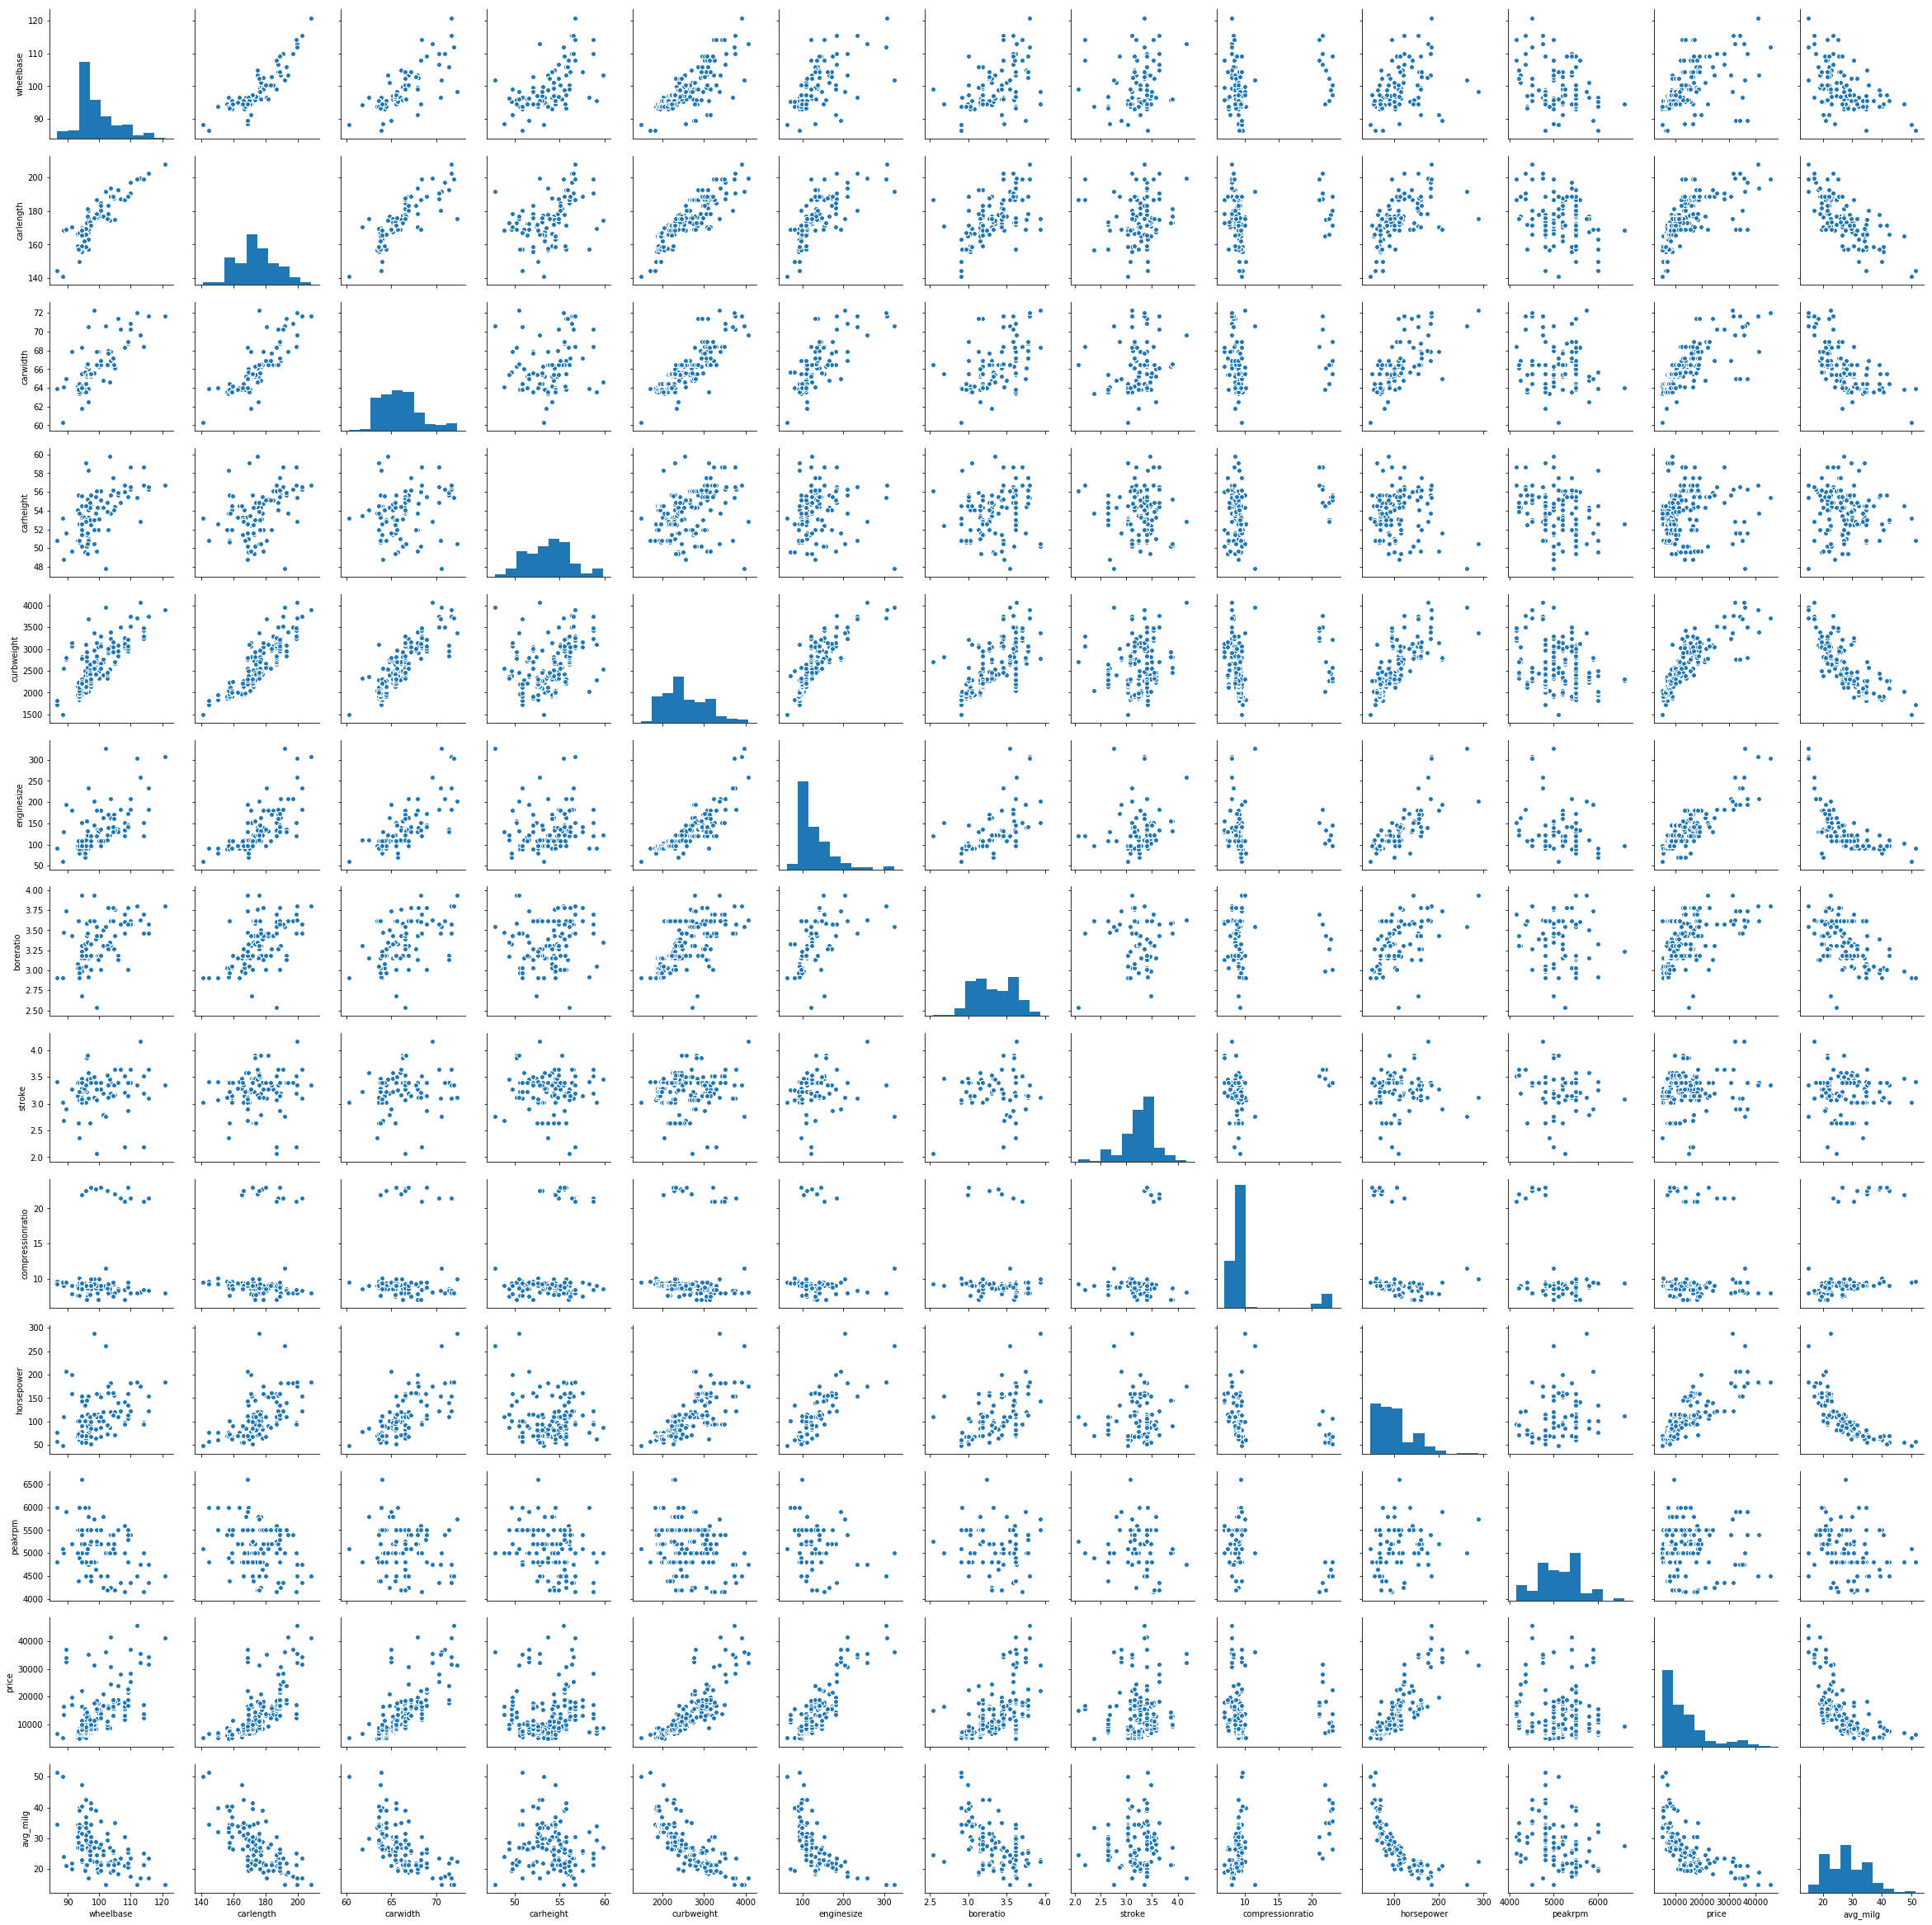

In [13]:
sns.pairplot(car_price)
plt.show()

#### Visualising Categorical Variables

#### Univariate analysis

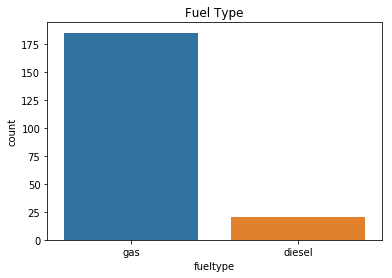

In [14]:
# Let us analyse using fuel type
plt.title('Fuel Type')
sns.countplot(car_price.fueltype)
plt.show()

Gas is the most preferred type of fuel

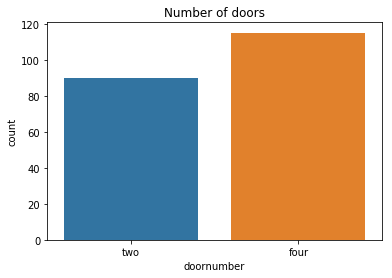

In [15]:
# Let us analyse using door number
plt.title('Number of doors')
sns.countplot(car_price.doornumber)
plt.show()

Cars with four doors are most preferred

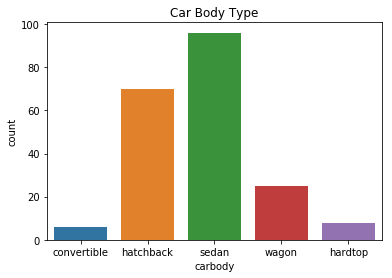

In [16]:
# Let us analyse using car body type
plt.title('Car Body Type')
sns.countplot(car_price.carbody)
plt.show()

Sedan is the most preferred type of car body

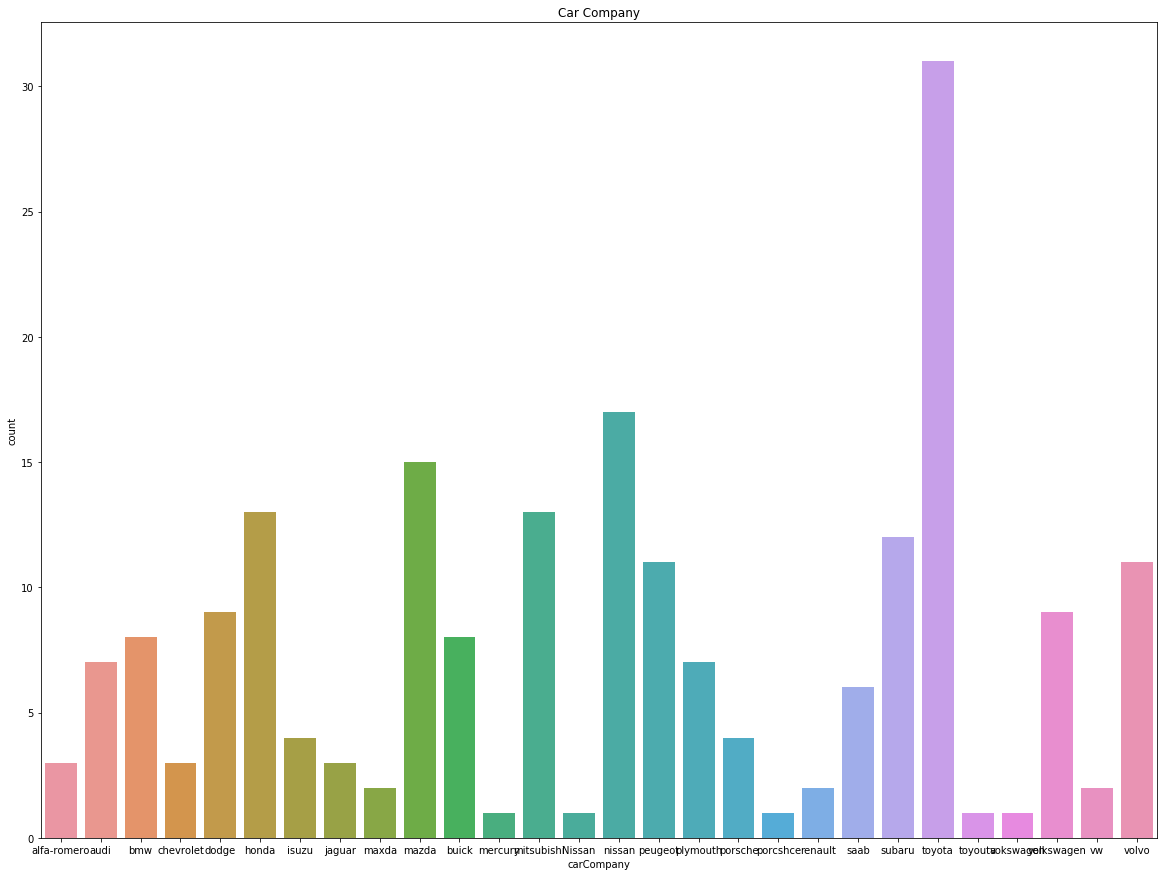

In [17]:
# Let us analyse with company name
plt.figure(figsize=(20, 15))
plt.title('Car Company')
sns.countplot(car_price.carCompany)
plt.show()

Toyota has been the most preferred car

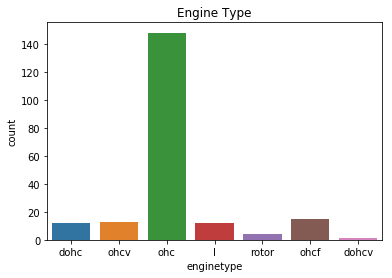

In [18]:
# Let us analyse using engine type
plt.title('Engine Type')
sns.countplot(car_price.enginetype)
plt.show()

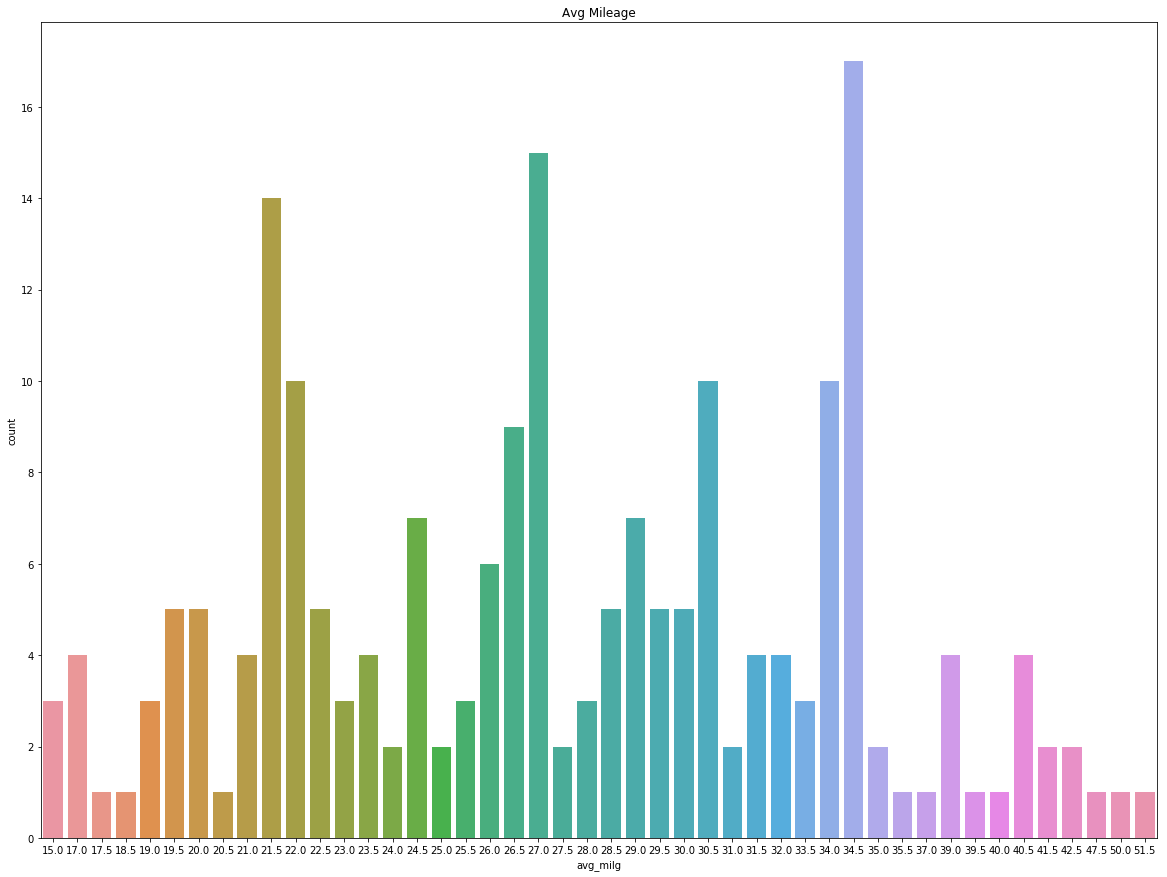

In [19]:
# Let us analyse using engine type
plt.figure(figsize =(20,15))
plt.title('Avg Mileage')
sns.countplot(car_price.avg_milg)
plt.show()

We see that mose vehicles have ohc type of engine

#### Bivariate Analysis

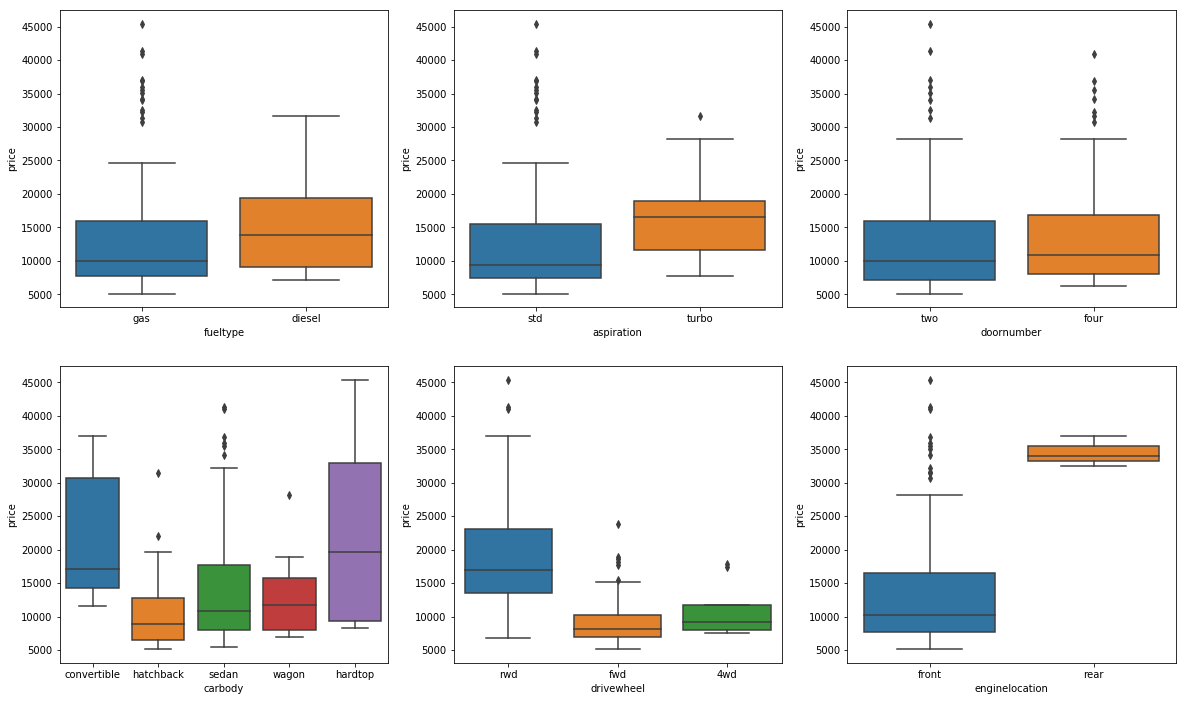

In [20]:
# Visualising categorical variables with respect to price
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car_price)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car_price)
plt.subplot(2,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car_price)
plt.subplot(2,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car_price)
plt.subplot(2,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_price)
plt.subplot(2,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_price)
plt.show()

1. We see that the cars whose fuel type diesel is priced higher.
2. Cars with aspiration turbo is priced higher.
3. There is not much price differnece between the two door cars and four door cars.
4. Hardtop car types are priced higher
5. Drivewheel with rwd are priced higher.
6. Cars with rare engine are priced very high.

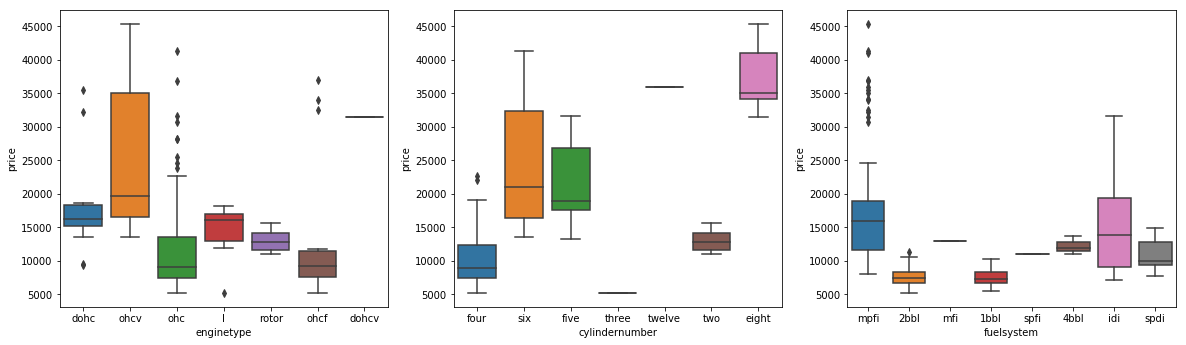

In [21]:
# Visualising categoriacal variables with respect to price in bar plots
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'enginetype', y = 'price', data = car_price)
plt.subplot(2,3,2)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_price)
plt.subplot(2,3,3)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_price)
plt.show()

1. We see that the cars whose engine type ohcv is priced higher.
2. Cars with 12 cylinders are priced higher.
3. mpfi and idi having the highest price range. 

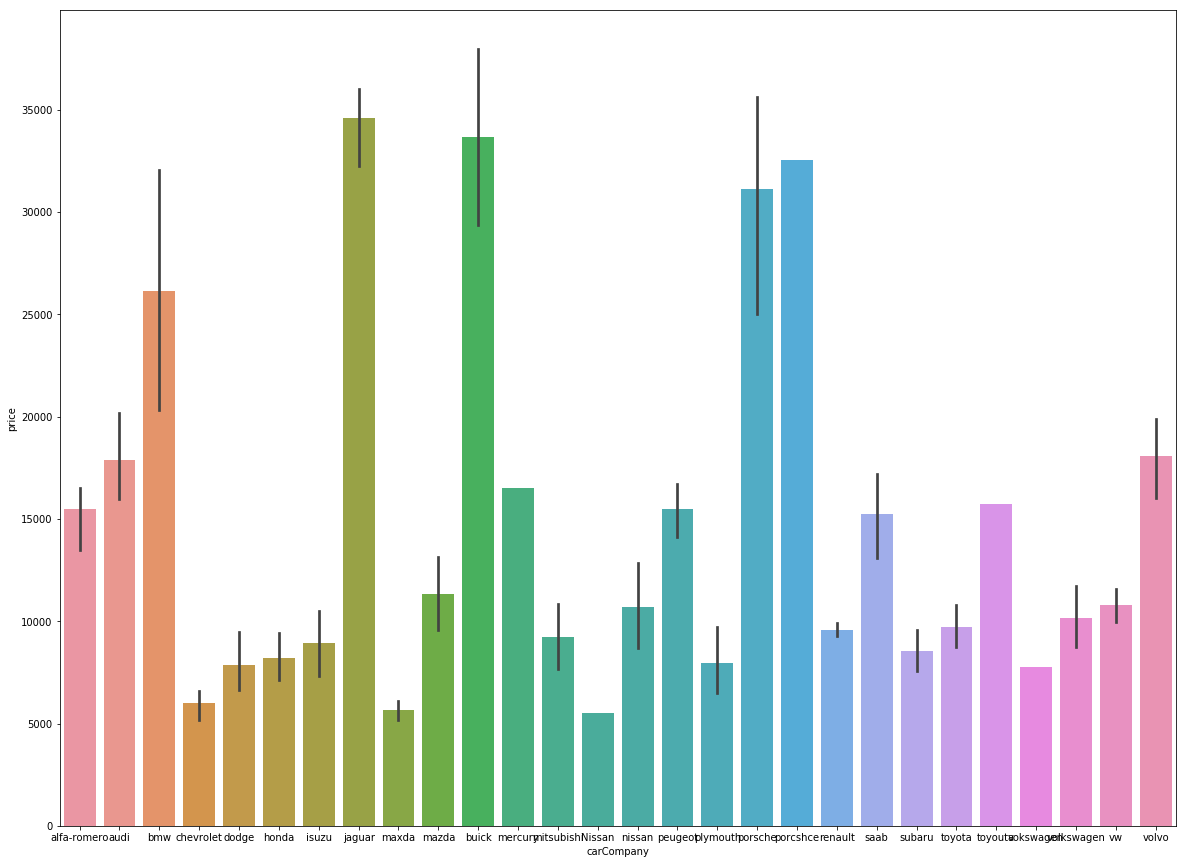

In [22]:
# Visualising the company of the car with repsect to price
plt.figure(figsize=(20, 15))
sns.barplot(x = 'carCompany', y = 'price', data = car_price)
plt.show()

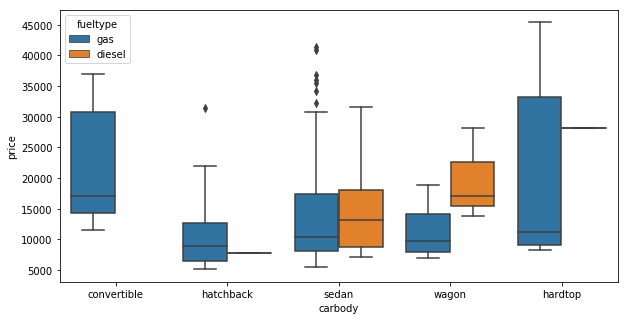

In [23]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'carbody', y = 'price', hue = 'fueltype', data = car_price)
plt.show()

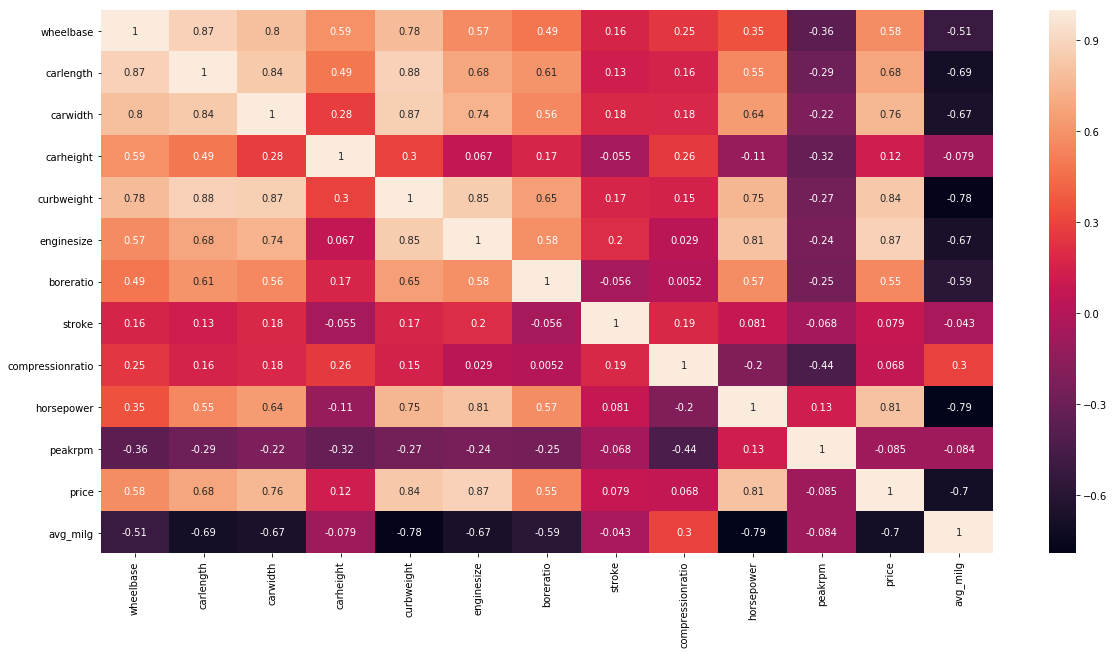

In [24]:
plt.figure(figsize = (20,10))  
sns.heatmap(car_price.corr(),annot = True)
plt.show()

# Step 3: Data Preparation

In [25]:
car_price.carCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [26]:
#renaming the company column names appropriately
car_price.carCompany = car_price.carCompany.str.lower()

def company_name(a,b):
    car_price.carCompany.replace(a,b,inplace=True)

company_name('alfa-romero','alfa-romeo')
company_name('maxda','mazda')
company_name('porcshce','porsche')
company_name('toyouta','toyota')
company_name('vokswagen','volkswagen')
company_name('vw','volkswagen')

In [27]:
# Convert all categorical variables to numerical
car_price['fueltype'] = car_price['fueltype'].map({'gas': 1, 'diesel': 0})
car_price['aspiration'] = car_price['aspiration'].map({'std': 1, 'turbo': 0})
car_price['doornumber'] = car_price['doornumber'].map({'two': 1, 'four': 0})
car_price['enginelocation'] = car_price['enginelocation'].map({'front': 1, 'rear': 0})

car_price.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,carCompany,avg_milg
0,1,1,1,convertible,rwd,1,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romeo,24.0
1,1,1,1,convertible,rwd,1,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romeo,24.0
2,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,alfa-romeo,22.5
3,1,1,0,sedan,fwd,1,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,audi,27.0
4,1,1,0,sedan,4wd,1,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,audi,20.0


### Dummy Variables

In [28]:
def get_dummy_variables(x,df):
    cars_dummy = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, cars_dummy], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df


car_price = get_dummy_variables('carbody',car_price)
car_price = get_dummy_variables('drivewheel',car_price)
car_price = get_dummy_variables('enginetype',car_price)
car_price = get_dummy_variables('cylindernumber',car_price)
car_price = get_dummy_variables('fuelsystem',car_price)
car_price = get_dummy_variables('carCompany',car_price)

In [29]:
car_price.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,0,0,0,0,0


In [30]:
car_price.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'price', 'avg_milg', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four',
       'six', 'three', 'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo'],
      dtype='object')

## Step 4: Splitting the Data into Training and Testing Sets

In [31]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car_price, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [33]:
# Apply scaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','avg_milg','carlength','carwidth','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,1,1,0,1,0.244828,0.426016,0.291667,50.8,0.272692,0.139623,...,0,0,1,0,0,0,0,0,0,0
125,1,1,1,1,0.272414,0.452033,0.666667,50.2,0.500388,0.339623,...,0,0,0,1,0,0,0,0,0,0
166,1,1,1,1,0.272414,0.448780,0.308333,52.6,0.314973,0.139623,...,0,0,0,0,0,0,0,1,0,0
1,1,1,1,1,0.068966,0.450407,0.316667,48.8,0.411171,0.260377,...,0,0,0,0,0,0,0,0,0,0
199,1,0,0,1,0.610345,0.775610,0.575000,57.5,0.647401,0.260377,...,0,0,0,0,0,0,0,0,0,1


In [34]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.909091,0.818182,0.440559,0.993007,0.411141,0.525476,0.461655,53.551748,0.407878,0.241351,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,2.433766,0.211269,0.154619,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.304167,51.800000,0.245539,0.135849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.341379,0.502439,0.425000,53.700000,0.355702,0.184906,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.669919,0.550000,55.350000,0.559542,0.301887,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,59.100000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


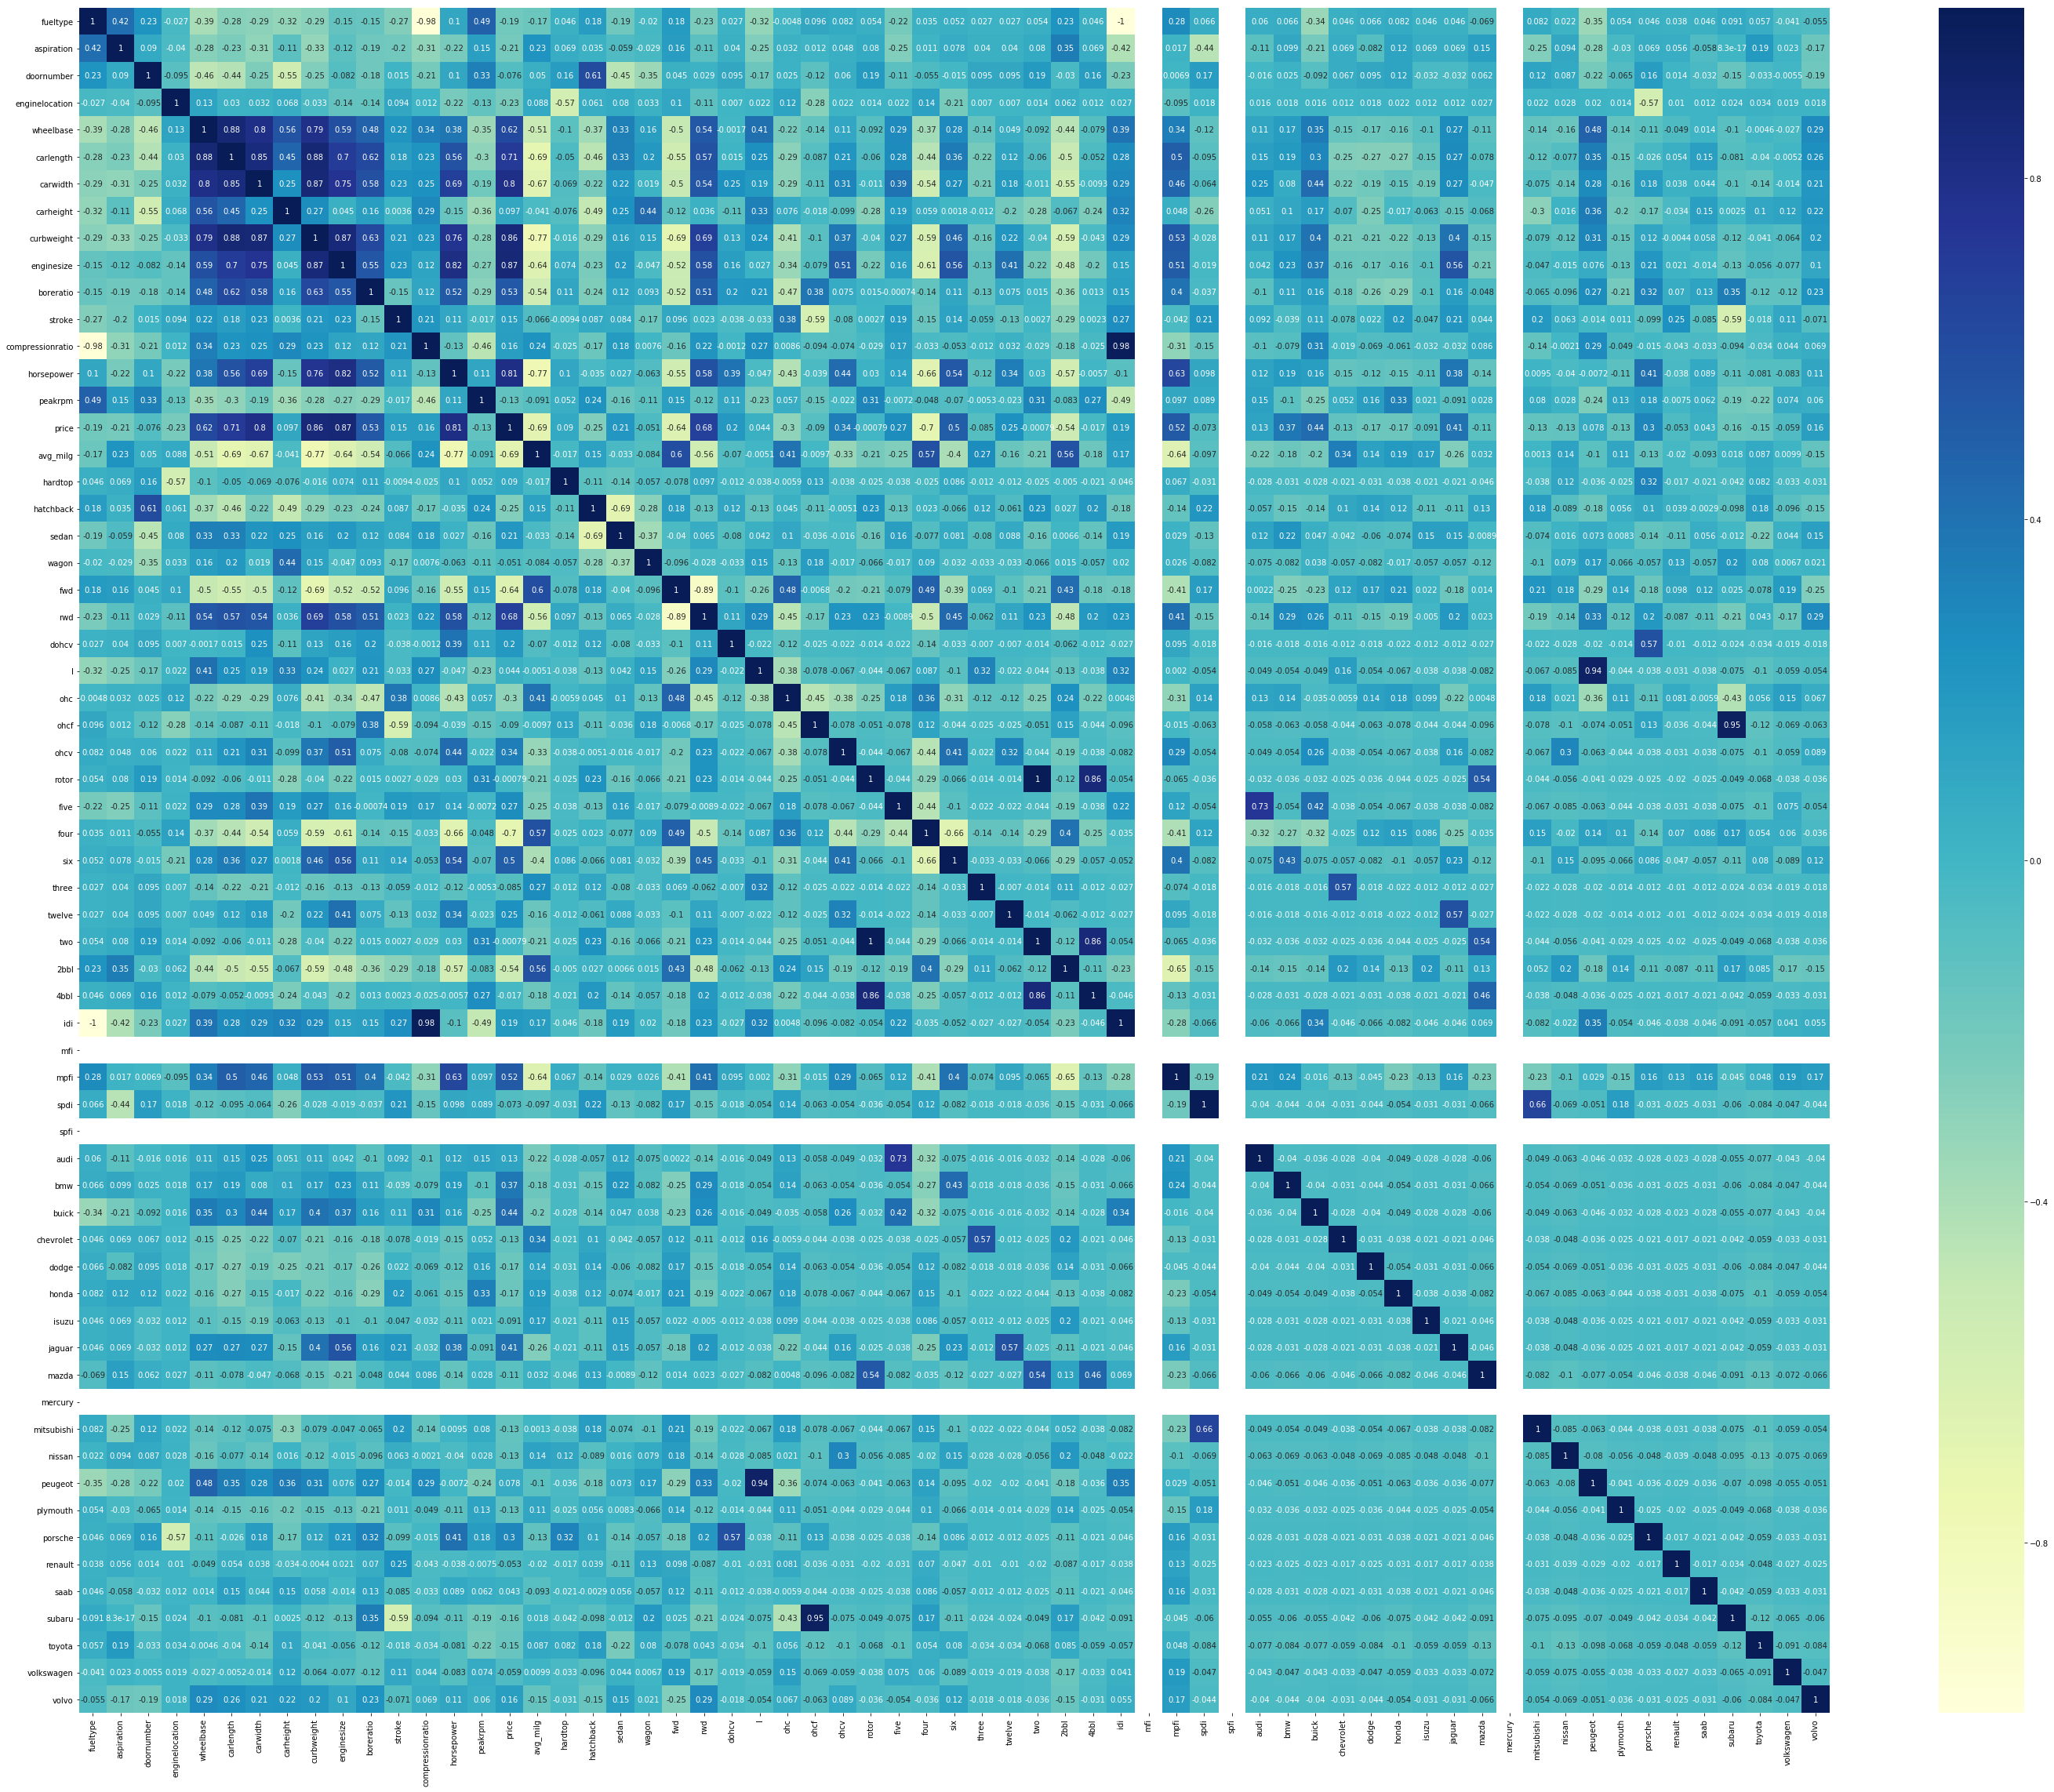

In [35]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (50,40))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

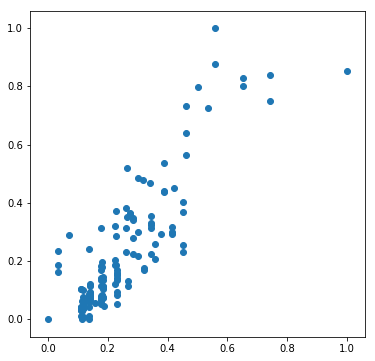

In [36]:
#Price is highly correlated with enginesize
plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, df_train.price)
plt.show()

### Dividing into X and Y sets for the model building

In [37]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building a linear model

### RFE

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 38),
 ('aspiration', False, 21),
 ('doornumber', False, 47),
 ('enginelocation', True, 1),
 ('wheelbase', False, 14),
 ('carlength', False, 8),
 ('carwidth', True, 1),
 ('carheight', False, 42),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 5),
 ('compressionratio', False, 44),
 ('horsepower', False, 11),
 ('peakrpm', False, 50),
 ('avg_milg', False, 49),
 ('hardtop', False, 17),
 ('hatchback', False, 15),
 ('sedan', False, 18),
 ('wagon', False, 16),
 ('fwd', False, 48),
 ('rwd', False, 24),
 ('dohcv', False, 36),
 ('l', False, 7),
 ('ohc', False, 43),
 ('ohcf', False, 12),
 ('ohcv', False, 22),
 ('rotor', True, 1),
 ('five', False, 3),
 ('four', False, 4),
 ('six', False, 31),
 ('three', True, 1),
 ('twelve', False, 2),
 ('two', True, 1),
 ('2bbl', False, 40),
 ('4bbl', False, 26),
 ('idi', False, 39),
 ('mfi', False, 52),
 ('mpfi', False, 29),
 ('spdi', False, 30),
 ('spfi', False, 51),
 ('audi', False, 25),
 ('b

In [41]:
X_train.columns[rfe.support_]

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'rotor', 'three', 'two', 'bmw', 'porsche'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [42]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,enginelocation,carwidth,curbweight,enginesize,boreratio,rotor,three,two,bmw,porsche
122,1,0.291667,0.272692,0.139623,0.230159,0,0,0,0,0
125,1,0.666667,0.500388,0.339623,1.000000,0,0,0,0,1
166,1,0.308333,0.314973,0.139623,0.444444,0,0,0,0,0
1,1,0.316667,0.411171,0.260377,0.626984,0,0,0,0,0
199,1,0.575000,0.647401,0.260377,0.746032,0,0,0,0,0


In [43]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### Model 1

In [44]:
X_train_new = build_model(X_train_rfe,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           1.18e-65
Time:                        21:22:04   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1760      0.084      2.

In [45]:
X_train_new = X_train_rfe.drop(["three"], axis = 1)

#### Model 2

In [46]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     163.9
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           2.55e-65
Time:                        21:22:04   Log-Likelihood:                 187.00
No. Observations:                 143   AIC:                            -356.0
Df Residuals:                     134   BIC:                            -329.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1755      0.085      2.

In [47]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
6,rotor,inf
7,two,inf
0,const,228.540000
3,curbweight,8.620000
4,enginesize,5.130000
2,carwidth,4.800000
5,boreratio,1.850000
9,porsche,1.800000
1,enginelocation,1.650000
8,bmw,1.090000


In [48]:
X_train_new = X_train_new.drop(["rotor"], axis = 1)


#### Model 3

In [49]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     163.9
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           2.55e-65
Time:                        21:22:05   Log-Likelihood:                 187.00
No. Observations:                 143   AIC:                            -356.0
Df Residuals:                     134   BIC:                            -329.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1755      0.085      2.

In [50]:
checkVIF(X_train_new)

,Features,VIF
0,const,228.54
3,curbweight,8.62
4,enginesize,5.13
2,carwidth,4.80
5,boreratio,1.85
8,porsche,1.80
1,enginelocation,1.65
6,two,1.17
7,bmw,1.09


In [51]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

#### Model 4

In [52]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     165.9
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           4.55e-63
Time:                        21:22:05   Log-Likelihood:                 178.67
No. Observations:                 143   AIC:                            -341.3
Df Residuals:                     135   BIC:                            -317.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1846      0.090      2.

In [53]:
X_train_new = X_train_new.drop(["boreratio"], axis = 1)

In [54]:
checkVIF(X_train_new)

,Features,VIF
0,const,226.38
3,enginesize,3.02
2,carwidth,2.77
1,enginelocation,1.64
6,porsche,1.59
4,two,1.13
5,bmw,1.09


In [55]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     189.8
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           1.55e-63
Time:                        21:22:05   Log-Likelihood:                 176.97
No. Observations:                 143   AIC:                            -339.9
Df Residuals:                     136   BIC:                            -319.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1694      0.091      1.

In [56]:
X_train_new = X_train_new.drop(["porsche"], axis = 1)

In [57]:
checkVIF(X_train_new)

,Features,VIF
0,const,155.97
3,enginesize,3.01
2,carwidth,2.68
4,two,1.12
5,bmw,1.09
1,enginelocation,1.08


In [58]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     224.4
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           3.81e-64
Time:                        21:22:06   Log-Likelihood:                 175.54
No. Observations:                 143   AIC:                            -339.1
Df Residuals:                     137   BIC:                            -321.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2530      0.076      3.

###### R-squared and Adjusted R-squared values are 0.891 and 0.887 which is a good score. p-values for all the values are less than 0.05

## Residual Analysis of the train data

In [59]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

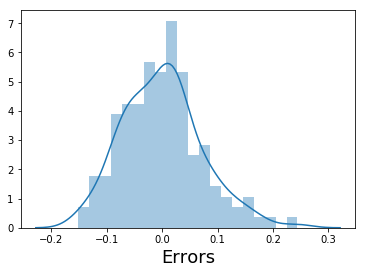

In [60]:
# Plot the histogram of the error terms
sns.distplot((y_train - y_train_price), bins = 20)
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

Error terms seem to be approximately normally distributed.

## Making Predictions

#### Applying the scaling on the test sets

In [61]:
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','avg_milg','carlength','carwidth','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [62]:
y_test = df_test.pop('price')
X_test = df_test

In [63]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [64]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

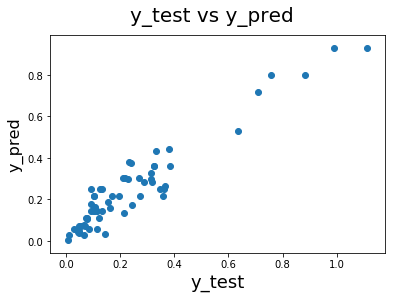

In [65]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [66]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.90045171060208862